In [10]:
import numpy as np
import matplotlib.pyplot as plt
import numba
import util
%load_ext memory_profiler

In [7]:
N = 4000
m = 2000
Sigma = np.eye(m)
J = np.random.rand(m,N)
A = J.T@Sigma@J
L, V = np.linalg.eigh(A)
L, V = L[::-1], V[:,::-1]
L1, V1, err1 =  util.Powit(J, np.diag(Sigma), 5)

In [8]:
%timeit util.Powit(J, np.diag(Sigma), 5)
%timeit np.linalg.eigh(A)
%memit util.Powit(J, np.diag(Sigma), 5)
%memit np.linalg.eigh(A)

15 s ± 89.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.12 s ± 57.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
peak memory: 618.52 MiB, increment: 91.56 MiB
peak memory: 1015.42 MiB, increment: 488.46 MiB


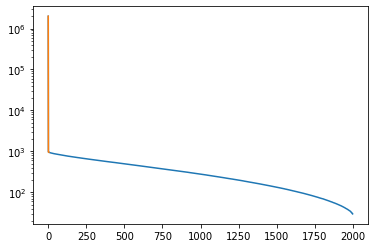

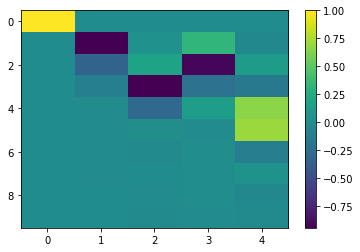

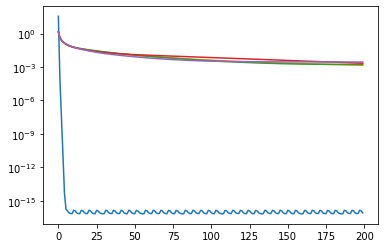

In [9]:
plt.plot(np.sort(np.real(L))[::-1][:m])
plt.plot(np.sort(L1)[::-1][:m])
plt.semilogy()
plt.show()
plt.imshow(((V.T@V1)[:10,:10]),aspect='auto')
plt.colorbar()
plt.show()
plt.semilogy(err1.T)
